# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('OK')

OK


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1], X_train.shape[2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_test).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

##### DEBUG JULIO #####
#print ('\nTRAIN FEAURES: ' + str(train['features'].shape))
#print (train['features'][0][0])
#print ('\nTRAIN LABELS: ' + str(train['labels'].shape))
#print (train['labels'])
#print ('\nTRAIN SIZES: ' + str(train['sizes'].shape))
#print (train['sizes'][0])
#print ('\nTRAIN COORDINATES: ' + str(train['coords'].shape))
#print (train['coords'][0])

print('OK')

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
OK


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

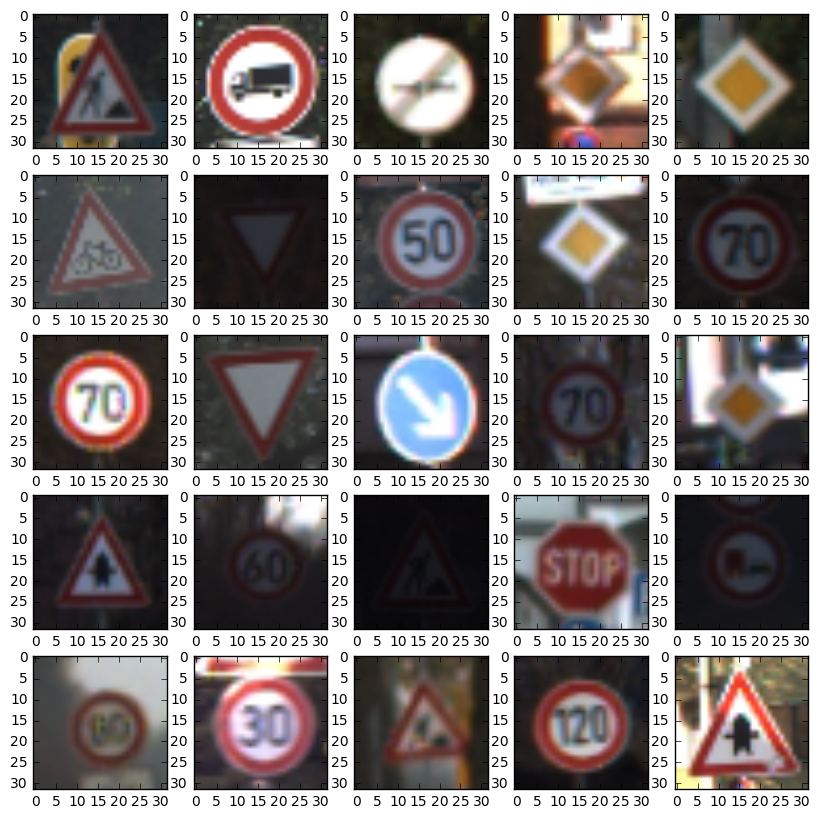

In [4]:
# JULIO: Visualize Data
import random

plt.figure(figsize=(10,10))
for i in range(25):
    sub = plt.subplot(5,5,i+1)
    rand = random.randint(0, n_train)
    image = X_train[rand].squeeze()
    plt.imshow(image)

In [5]:
# JULIO: Print Basic Information
print("Image Shape:  {}".format(X_train[0].shape))
print("Training Set: {}".format(len(X_train)))
print("Test Set:     {}".format(len(X_test)))

Image Shape:  (32, 32, 3)
Training Set: 39209
Test Set:     12630


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [6]:
# JULIO: Validate Size Data
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))
print ('OK')

OK


In [7]:
# JULIO: PREPOCESS: Normalize Image: Train and Test Data (TESTING)
X_train = X_train.astype(float)
X_train /= 255.0

X_test = X_test.astype(float)
X_test /= 255.0

print('OK')

OK


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I Normalize the data by deviding the image array by 255.0. This will change the data to numbers between 0 and 1. I select this technique because the image is a RGB image and each vector has a value between 0 and 255.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [8]:
# JULIO: Create Validation Data (Split Data)
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("OK")

OK


In [9]:
# JULIO: Shuffle the Training Data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
print('OK')

OK


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Al I have done was to import the training and testing data and then shuffle the data to avoid any bias. Then I split the training data in 2 different groups, the training data using "train_test_split". I have also shuffled the data to avoid any bias.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [10]:
# JULIO: Training Speed and Model Accuracy
import tensorflow as tf

EPOCHS = 100 #JULIO: Change this to experiment with performance
BATCH_SIZE = 128 #JULIO: Change this to experiment with performance
print('OK')

OK


In [11]:
# JULIO: LeNet
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # FORMULA NEW HEIGHT: out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # FORMULA NEW WIDTH: out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    # SHAPE: height, width, input_depth, output_depth
    
    # LAYER 1: CONVOLUTIONAL: Input = 32x32x3 / Output = 28x28x6 (Change to 3)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)) #JULIO: cambie a input '3'
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # ACTIVATION: RELU
    conv1 = tf.nn.relu(conv1)
    # POOLING: Input = 28x28x6 / Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # LAYER 2: CONVOLUTIONAL: Output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # ACTIVATION: RELU
    conv2 = tf.nn.relu(conv2)
    # POOLING: Input = 10x10x16 / Output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # FLATTEN: Input = 5x5x16 / Output = 400
    fc0   = flatten(conv2)
    
    # LAYER 3: FULLY CONNECTED: Input = 400 / Output = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # ACTIVATION: RELU
    fc1    = tf.nn.relu(fc1)
    
    # LAYER 4: FULLY CONNECTED: Input = 120 / Output = 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # ACTIVATION: RELU
    fc2    = tf.nn.relu(fc2)
    
    # LAYER 5: FULLY CONNECTED: Input = 84 / Output = 43 (Change to 43)
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) #JULIO: Change to 43 classes
    fc3_b  = tf.Variable(tf.zeros(43)) # JULIO: Change to 43 classes
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

* Layer 1: Convolutional. The output shape should be 28x28x6.
* Activation RELU.
* Pooling. The output shape should be 14x14x6.
* Layer 2: Convolutional. The output shape should be 10x10x16.
* Activation RELU.
* Pooling. The output shape should be 5x5x16.
* Flatten. Flatten the output shape of the final pooling layer.
* Layer 3: Fully Connected. This should have 120 outputs.
* Activation RELU.
* Layer 4: Fully Connected. This should have 84 outputs.
* Activation RELU.
* Layer 5: Fully Connected (Logits). This should have 43 outputs.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [12]:
# JULIO: x and y placeholders (Features and Labels)
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) #JULIO: Change to 3
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43) # Change to 43
print('OK')

OK


In [13]:
# JULIO: Training Pipeline
rate = 0.001 #JULIO: Change this to experiment with performance

# Pass the input data to the lenet function to calculate the logits
logits = LeNet(x)

# Compare the logits to the labels and calculate the cross entropy (Mesures the difference between logits and labels)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# Averages the cross entropy from all the training images
loss_operation = tf.reduce_mean(cross_entropy)

# Minimize the lost function, similar to stochastic gradient descent, but better
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# Backpropagation to update the network and minimize the training lost
training_operation = optimizer.minimize(loss_operation)
print('OK')

OK


In [14]:
# JULIO: Model Evaluation (Evaluate how well the loss and accuracy of the model for a given dataset)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
# JULIO: Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.695

EPOCH 2 ...
Validation Accuracy = 0.825

EPOCH 3 ...
Validation Accuracy = 0.908

EPOCH 4 ...
Validation Accuracy = 0.920

EPOCH 5 ...
Validation Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.948

EPOCH 7 ...
Validation Accuracy = 0.958

EPOCH 8 ...
Validation Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.969

EPOCH 10 ...
Validation Accuracy = 0.963

EPOCH 11 ...
Validation Accuracy = 0.967

EPOCH 12 ...
Validation Accuracy = 0.972

EPOCH 13 ...
Validation Accuracy = 0.975

EPOCH 14 ...
Validation Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.972

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.971

EPOCH 18 ...
Validation Accuracy = 0.976

EPOCH 19 ...
Validation Accuracy = 0.972

EPOCH 20 ...
Validation Accuracy = 0.969

EPOCH 21 ...
Validation Accuracy = 0.975

EPOCH 22 ...
Validation Accuracy = 0.979

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24 ...
Validation Accura

In [16]:
# JULIO: FINAL - EVALUATE THE MODEL (Run this code only when we are satisfied with the accuracy)
# Class used to save and/or restore Tensor Variables
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Restored')
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Restored
Test Accuracy = 0.926


In [ ]:
##### (DO NOT RUN THIS CELL) ##### TESTING ##### (DO NOT RUN THIS CELL) #####

# TESTING: tf.nn.top_k
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Restored')
    output = sess.run(softmax, feed_dict={x: X_test[0:10]})
    top3_pred = sess.run(tf.nn.top_k((output), k=3))
    print(top3_pred)
    #print(type(X_test))

##### (DO NOT RUN THIS CELL) ##### TESTING ##### (DO NOT RUN THIS CELL) #####

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I have tried many different options:
* I changed EPOCHS to 15, 18, 20 and many other numbers but I sayed with 200. The Training went to 99% and the Test Acuracy to 94% 
* Then I changed the Batch_Size to 32, 64, 96, 170, 256 but 128 works fine.
* Then I change the sigma to 0.5, 0.2 and 0.5 but 0.1 works fine.
* So my final numbers were those suggested by the course, I couldn't find a better combination than EPOCHS = 200, Batch_Size = 128 and Sigma = 0.1
* After review the slack comments I increased my EPOCH to 200 and the validation accuracy increases to 99%. I will run it with 200 EPOCHS after submition.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
* I test every part of the code to understand what each line does, then I moved to the next section. I play with the variables to have a better understanding of the shape and information stored by multiple variables. At the end, I test the code changing some variables to see how the accuracy is affected by those changes.
* The most painful section was the Question 8 (tf.nn.softmax). It was not enough information about how to implement this code. I tested many many different options, I google it, review the forum, posted questions on the forum, posted question on slack, review slack and finally I found an alternative solution on the forums that help me understand how to use it, so I tested on the X-train data, then on my 5 images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

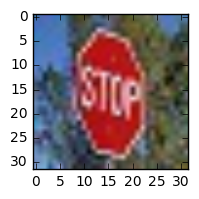

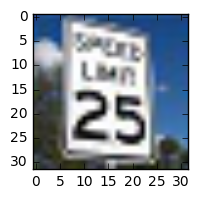

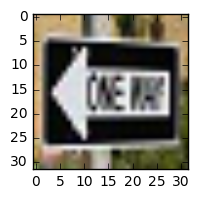

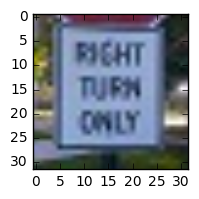

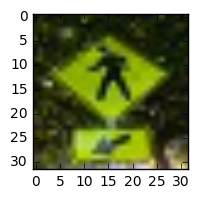

In [17]:
# JULIO: Plot Images
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Visualizations will be shown in the notebook
%matplotlib inline

# read all file names under newImages directory
test_images = ["sign01.jpg","sign02.jpg","sign03.jpg", "sign04.jpg", "sign05.jpg"]

# Load Images
new_images = []
for i in range(len(test_images)):
    # append images
    new_images.append(plt.imread("./newImages/"+ test_images[i]))

# Plot Images
for i in range(len(new_images)):
    plt.figure(figsize=(2,2))
    plt.imshow(new_images[i])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Yes, there is one sign (sign05.jpg) that is composed of 2 signs. I will like to see what the model will predict.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [32]:
# JULIO: Normalize Data
new_images_array = np.asarray(new_images)
print(new_images_array.shape)

new_images_array = new_images_array.astype('float32')
new_images_array /= 255.0

print('OK')
print(new_images_array[0][0][0])

(5, 32, 32, 3)
OK
[ 0.23137255  0.45882353  0.65490198]


[14 31 38 26 12]


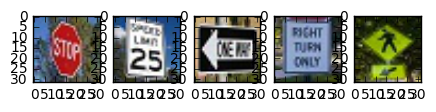

In [117]:
# JULIO: Prediction
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    get_new_prediction = tf.argmax(logits, 1) # REVIEW THIS, WHAT LOGITS GOES HERE? OLD OR NEW??
    new_predictions = sess.run(get_new_prediction, feed_dict={x: new_images_array}) # SHOULD I CREATE A NEW VARIABLE x_new??

print(new_predictions)

plt.figure(figsize=(5,5))
for i in range(5):
    sub = plt.subplot(1,5,i+1)
    image = new_images_array[i].squeeze()
    plt.imshow(image)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Close enough. I got 80% accuracy on the new images.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

Image01 Probability : [ 100.    0.    0.]
Labels              : [14 17 22]

Image02 Probability : [ 100.    0.    0.]
Labels              : [31 12 18]

Image03 Probability : [ 99.80000305   0.2          0.        ]
Labels              : [38 22 25]

Image04 Probability : [ 79.09999847  15.29999924   3.20000005]
Labels              : [26 24 20]

Image05 Probability : [ 99.59999847   0.2          0.2       ]
Labels              : [12  5 15]


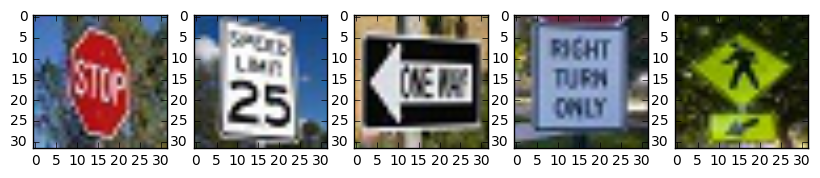

In [123]:
# JULIO: Visualize Softmax Probabilities (Top 3 Values)
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #print('Restored')
    output = sess.run(softmax, feed_dict={x: new_images_array})
    top3_pred = sess.run(tf.nn.top_k((output), k=3))

new_values = (np.ndarray.round(top3_pred[0], decimals=3)) * 100

plt.figure(figsize=(10,10))
for i in range(5):
    sub = plt.subplot(1,5,i+1)
    image = new_images_array[i].squeeze()
    plt.imshow(image)

print('Image01 Probability : ' + str((new_values[0])))
print('Labels              : ' + str(top3_pred[1][0]))

print('\nImage02 Probability : ' + str((new_values[1])))
print('Labels              : ' + str(top3_pred[1][1]))

print('\nImage03 Probability : ' + str((new_values[2])))
print('Labels              : ' + str(top3_pred[1][2]))

print('\nImage04 Probability : ' + str((new_values[3])))
print('Labels              : ' + str(top3_pred[1][3]))

print('\nImage05 Probability : ' + str((new_values[4])))
print('Labels              : ' + str(top3_pred[1][4]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
* FIRST IMAGE (Stop Sign): image was very certain. 100% of precision. It is a stop sign, and the code predicted a stop sign.
* SECOND IMAGE (Speed Limit 25): I really don't know what happened there, The code predicted a wilde animal, maybe is because the resolution is really bad and somehow it thought it is a wierd animal. The second and third predictions are almost zero and what ever predicts shouldn't count as any valid option. Which is weird here is that my code predict correctly at the beginning, after I run the code many testing times it change it prediction.
* THIRD IMAGE (One Way): It predict keep right, I think is close enough. It is a narroz that sometimes can be used to specify keep right. The other 2 predictions are not accurate and the probability is very low to consider as an option.
* FOURTH IMAGE (Right Turn Only): It predicts 'Traffic Signal', well, it is a traffic signal, so I counted as acurate. The second option has a 15% probability that we need to consider. It predicted 'Dangerous curve to the right'. If you see the image from far away may looks that said 'curve right', so I will say that is an option to consider.
* FIFTH IMAGE (Priority Road): This is acurate. Has a probability of 99% and it is correct. Give priority to the person crossing the road.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.